<a target="_blank" href="https://colab.research.google.com/github/lamm-mit/MechAgents/blob/main/2_colab_notebook_cmp_TwoA_vs_MulA_LE/0_MultiVsTwo_OneStep_LE.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The multi-agent group Vs. the two-agent team in solving more pratical mechanics problems 

Reference:
Ni, Bo, and Markus J. Buehler. "MechAgents: Large language model multi-agent collaborations can solve mechanics problems, generate new data, and integrate knowledge." Extreme Mechanics Letters (2024)

# 0. Prepare the packages

In [1]:
# prepare fenics for colab
try:
    import dolfin
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/fenics-install-real.sh" -O "/tmp/fenics-install.sh" && bash "/tmp/fenics-install.sh"
    import dolfin

--2023-11-06 02:50:18--  https://fem-on-colab.github.io/releases/fenics-install.sh
Resolving fem-on-colab.github.io (fem-on-colab.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to fem-on-colab.github.io (fem-on-colab.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4156 (4.1K) [application/x-sh]
Saving to: ‘/tmp/fenics-install.sh’

/tmp/fenics-install 100%[===================>]   4.06K  --.-KB/s    in 0s      

2023-11-06 02:50:18 (38.2 MB/s) - ‘/tmp/fenics-install.sh’ saved [4156/4156]

+ INSTALL_PREFIX=/usr/local
++ echo /usr/local
++ awk -F/ '{print NF-1}'
+ INSTALL_PREFIX_DEPTH=2
+ PROJECT_NAME=fem-on-colab
+ SHARE_PREFIX=/usr/local/share/fem-on-colab
+ FENICS_INSTALLED=/usr/local/share/fem-on-colab/fenics.installed
+ [[ ! -f /usr/local/share/fem-on-colab/fenics.installed ]]
+ PYBIND11_INSTALL_SCRIPT_PATH=https://github.com/fem-on-colab/fem-on-colab.github.io/raw/af0ba58/releases/pybind11-install.s

In [2]:
try:
    import chromadb
except ImportError:
    !pip install chromadb==0.4.15
    import chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.8/479.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 189.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 4

In [3]:
try:
    import tiktoken
except ImportError:
    !pip install tiktoken==0.5.1
    import tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.


In [4]:
try:
    import pypdf
except ImportError:
    !pip install pypdf==3.17.0
    import pypdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.4/277.4 kB 3.6 MB/s eta 0:00:00


In [5]:
# add autogen
#
try:
    import autogen
except ImportError:
    !pip install pyautogen==0.1.14
    import autogen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.2/295.2 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 10.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.


# 1. Working part

## 1.1 Set the API endpoint

In [6]:
import autogen

config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    file_location=".",
    filter_dict={
        "model": ["gpt-3.5-turbo", "gpt-35-turbo", "gpt-35-turbo-0613", "gpt-4", "gpt4", "gpt-4-32k"],
    },
)

print("LLM models: ", [config_list[i]["model"] for i in range(len(config_list))])

LLM models:  []


In [7]:
# here, we set it locally
config_list_gpt = [
    {
        "model": "gpt-4",
        "api_key": "Your openAI API key"
    }
]


## 1.2 Construct agents

In [17]:
# gpt4_config = {
#     "seed": 42,  # change the seed for different trials
#     "temperature": 0,
#     "config_list": config_list_gpt,
#     "request_timeout": 240,
# }

gpt4_config = {
    "seed": 45,  # change the seed for different trials
    "temperature": 0,
    "config_list": config_list_gpt,
    "request_timeout": 600,
    "retry_wait_time": 120,
}


In [19]:
user_proxy = autogen.UserProxyAgent(
   name="Admin",
   system_message="A human admin. Interact with the planner to discuss the plan. Plan execution needs to be approved by this admin.",
   code_execution_config=False,
)

# engineer = autogen.AssistantAgent(
#     name="Engineer",
#     llm_config=gpt4_config,
#     system_message='''Engineer. You follow an approved plan. You write python/shell code to solve tasks. Wrap the code in a code block that specifies the script type. The user can't modify your code. So do not suggest incomplete code which requires others to modify. Don't use a code block if it's not intended to be executed by the executor.
# Don't include multiple code blocks in one response. Do not ask others to copy and paste the result. Check the execution result returned by the executor.
# If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
# ''',
# )
engineer = autogen.AssistantAgent(
    name="Engineer",
    llm_config=gpt4_config,
    system_message='''Engineer. You follow an approved plan.
    You write python code to solve tasks using FENICS.
    You pay attension to mesh, boundary conditions, material properties and constitutive law.
    Wrap the code in a code block that specifies the script type. The user can't modify your code. So do not suggest incomplete code which requires others to modify. Don't use a code block if it's not intended to be executed by the executor.
    Don't include multiple code blocks in one response. Do not ask others to copy and paste the result. Check the execution result returned by the executor.
    If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
    When writing code, assert the the boundary condition.
    You don't install packages.''',
)

# scientist = autogen.AssistantAgent(
#     name="Scientist",
#     llm_config=gpt4_config,
#     system_message="""Scientist. You follow an approved plan. You are able to categorize papers after seeing their abstracts printed. You don't write code."""
# )
#
scientist = autogen.AssistantAgent(
    name="Scientist",
    llm_config=gpt4_config,
    system_message="""Scientist. You follow an approved plan.
    You are able to figure out 1. geometry of the mesh; 2. boundary conditions; 3. constitutive law of materails and related material properties and 4. formulate the mechanics problem.
    You don't write or excute code.
    You explicit check the boundary results with the given boundary conditions."""
)

planner = autogen.AssistantAgent(
    name="Planner",
    system_message='''Planner. Suggest a plan. Revise the plan based on feedback from admin and critic, until admin approval.
The plan may involve an engineer who can write code and a scientist who doesn't write code.
Explain the plan first. Be clear which step is performed by an engineer, and which step is performed by a scientist.
''',
    llm_config=gpt4_config,
)

executor = autogen.UserProxyAgent(
    name="Executor",
    system_message="Executor. Save and execute the code written by the engineer and report and save the result.",
    human_input_mode="NEVER",
    code_execution_config={"last_n_messages": 3, "work_dir": "Mechanics"},
)

critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""Critic.
    You double check plan, claims, code from other agents, results on the boundary conditions and provide feedback.
    Check whether the plan includes adding verifiable info such as satisfying boundary conditions, having source URL.""",
    llm_config=gpt4_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, planner, engineer, scientist, executor, critic], messages=[], max_round=50)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=gpt4_config)

## 1.3 Start chat

In [20]:
user_proxy.initiate_chat(
    manager,
    message="""A 2D plate occupies 1m-by-1m domain.
    It is made of copper and has a circular hole of radius 0.2m in the middle.
    It has zero displacement on the left edge and 0.02m displacement along x direction on the right edge.
    The top and bottom edges are free to move.
    Please use FENICS to solve the displacement, store the result in a PNG file and figure out the total force on the right edge.""",
)

Admin (to chat_manager):

A 2D plate occupies 1m-by-1m domain.
    It is made of copper and has a circular hole of radius 0.2m in the middle.
    It has zero displacement on the left edge and 0.02m displacement along x direction on the right edge.
    The top and bottom edges are free to move.
    Please use FENICS to solve the displacement, store the result in a PNG file and figure out the total force on the right edge.

--------------------------------------------------------------------------------
Planner (to chat_manager):

Plan:

1. Engineer: Install the necessary software, including FENICS, a computing platform for solving partial differential equations (PDEs), and any dependencies. 

2. Scientist: Define the problem in mathematical terms. This includes defining the geometry of the plate, the material properties (in this case, copper), the boundary conditions (displacement on the left and right edges, free movement on the top and bottom edges), and the PDE to be solved (in this 

Executor (to chat_manager):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "", line 32, in <module>
    a = inner(sigma(u), epsilon(v))*dx
  File "", line 24, in sigma
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)
NameError: name 'lambda_' is not defined


--------------------------------------------------------------------------------
Engineer (to chat_manager):

I apologize for the oversight. The material properties for copper, including the Lame's first parameter (lambda_) and the shear modulus (mu), were not defined in the code. Let's correct this. The values for copper are lambda_=76.9 GPa and mu=48.3 GPa. Here is the corrected code:

```python
from fenics import *
import matplotlib.pyplot as plt

# Define mesh and function space
mesh = RectangleMesh(Point(0, 0), Point(1, 1), 100, 100)
V = VectorFunctionSpace(mesh, 'P', 1)

# Define boundary condition
def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0

Executor (to chat_manager):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "", line 36, in <module>
    a = inner(sigma(u), epsilon(v))*dx
  File "", line 24, in sigma
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)
NameError: name 'nabla_div' is not defined


--------------------------------------------------------------------------------
Engineer (to chat_manager):

I apologize for the oversight. The function `nabla_div` is not defined in the code. This function computes the divergence of a vector field. In FEniCS, the divergence can be computed using the `div` function. Here is the corrected code:

```python
from fenics import *
import matplotlib.pyplot as plt

# Define mesh and function space
mesh = RectangleMesh(Point(0, 0), Point(1, 1), 100, 100)
V = VectorFunctionSpace(mesh, 'P', 1)

# Define boundary condition
def left_boundary(x, on_boundary):
    return on_boundary and near(x[0], 0)

def right_boundary(x, on_boundary):
  

Executor (to chat_manager):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "", line 54, in <module>
    ds = Measure('ds', domain=mesh, subdomain_data=boundaries)
NameError: name 'boundaries' is not defined. Did you mean: 'BoundaryMesh'?


--------------------------------------------------------------------------------
Engineer (to chat_manager):

I apologize for the oversight. The variable `boundaries` was not defined in the code. This variable is supposed to contain the boundary markers for the mesh, but it seems we don't need it in this case. Here is the corrected code:

```python
from fenics import *
import matplotlib.pyplot as plt
import mshr

# Define geometry for the mesh
domain = mshr.Rectangle(Point(0, 0), Point(1, 1)) - mshr.Circle(Point(0.5, 0.5), 0.2)
mesh = mshr.generate_mesh(domain, 100)

# Define function space
V = VectorFunctionSpace(mesh, 'P', 1)

# Define boundary condition
def left_boundary(x, on_boundary):
    return on_bound

Executor (to chat_manager):

exitcode: 1 (execution failed)
Code output: 
Traceback (most recent call last):
  File "", line 55, in <module>
    force = dot(sigma(u), n)*ds(2)
  File "/usr/local/lib/python3.10/dist-packages/ufl_legacy/measure.py", line 408, in __rmul__
    error("Can only integrate scalar expressions. The integrand is a "
  File "/usr/local/lib/python3.10/dist-packages/ufl_legacy/log.py", line 158, in error
    raise self._exception_type(self._format_raw(*message))
ufl_legacy.log.UFLException: Can only integrate scalar expressions. The integrand is a tensor expression with value shape (2,) and free indices with labels ().


--------------------------------------------------------------------------------
Engineer (to chat_manager):

I apologize for the oversight. The force calculation is incorrect because the dot product of the stress tensor and the normal vector results in a vector, not a scalar. We need to compute the dot product of this vector with the direction of d

Executor (to chat_manager):

exitcode: 0 (execution succeeded)
Code output: 
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Total force on the right edge:  0.0


--------------------------------------------------------------------------------
Critic (to chat_manager):

The code execution was successful, but the total force on the right edge is reported as 0.0, which seems incorrect. This could be due to the fact that the stress tensor `sigma(u)` is not correctly defined or the force calculation is not correct. 

The stress tensor for linear elasticity is usually defined as `sigma(u) = lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)`, where `lambda_` and `mu` are Lame's first parameter and the shear modulus, respectively, `nabla_div(u)` is the divergence of the displacement, `Identity(d)` is the identity tensor, and `epsilon(u)` is the strain tensor. 

The force calculation `force = dot(dot(sigma(u), n), Constant((1, 0)))*ds(2)` 

Executor (to chat_manager):

exitcode: 0 (execution succeeded)
Code output: 
Solving linear variational problem.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Total force on the right edge:  2052608504.7424448


--------------------------------------------------------------------------------
Critic (to chat_manager):

The code execution was successful and the total force on the right edge is reported as approximately 2052608504.74 Newtons. This seems to be a reasonable result for the given problem. The code correctly defines the problem, solves it using FEniCS, and computes the total force on the right edge. The code also correctly handles the boundary conditions and the circular hole in the middle of the plate. The displacement field is saved to a PNG file as required. The units for the displacement and the force are correctly specified as meters and Newtons, respectively. Overall, the code appears to be correct and complete.

--------------------------------------

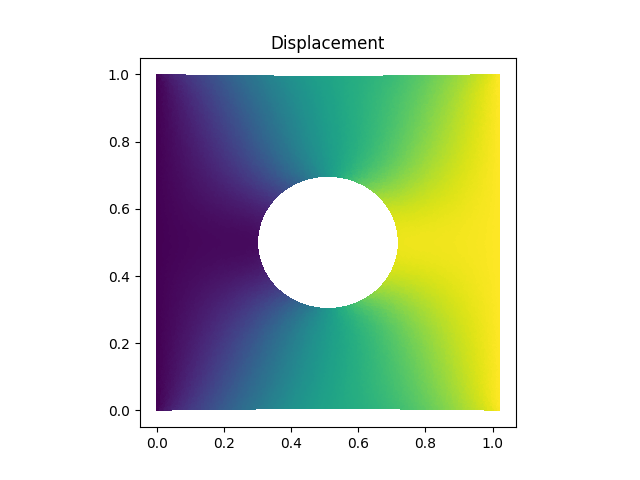

In [22]:
# show the result
from IPython.display import Image
Image('./Mechanics/displacement.png')

## If we use one-agent

In [23]:
gpt4_config_OneAgent = {
    "seed": 46,  # change the seed for different trials
    "temperature": 0,
    "config_list": config_list_gpt,
    "request_timeout": 600,
    "retry_wait_time": 120,
}

In [24]:
# create a UserProxyAgent instance named "user_proxy"
# 1. run code written by assistantAgent
# 2. provide feedback if needed, but keep quite during one round
#
user_proxy_OA = autogen.UserProxyAgent(
    name="user_proxy_OA",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    code_execution_config={
        "work_dir": "Mechanics_OneAgent",
        "use_docker": False,  # set to True or image name like "python:3" to use docker
    },
)


# create an AssistantAgent named "assistant"
# assistant = autogen.AssistantAgent(
#     name="assistant",
#     llm_config=gpt4_config,  # configuration for autogen's enhanced inference API which is compatible with OpenAI API
#     system_message='''Assistant. You make plan, formulate the problem, write code using FENICS and review the result.'''
# )

assistant_OA = autogen.AssistantAgent(
    name="assistant_OA",
    llm_config=gpt4_config_OneAgent,  # configuration for autogen's enhanced inference API which is compatible with OpenAI API
)

In [25]:
# the assistant receives a message from the user_proxy, which contains the task description
user_proxy_OA.initiate_chat(
    assistant_OA,
    message="""A 2D plate occupies 1m-by-1m domain.
    It is made of copper and has a circular hole of radius 0.2m in the middle.
    It has zero displacement on the left edge and 0.02m displacement along x direction on the right edge.
    The top and bottom edges are free to move.
    Please use FENICS to solve the displacement, store the result in a PNG file and figure out the total force on the right edge.""",
)

user_proxy_OA (to assistant_OA):

A 2D plate occupies 1m-by-1m domain.
    It is made of copper and has a circular hole of radius 0.2m in the middle.
    It has zero displacement on the left edge and 0.02m displacement along x direction on the right edge.
    The top and bottom edges are free to move.
    Please use FENICS to solve the displacement, store the result in a PNG file and figure out the total force on the right edge.

--------------------------------------------------------------------------------
assistant_OA (to user_proxy_OA):

To solve this problem, we will use the FEniCS library in Python, which is a popular library for solving partial differential equations (PDEs). We will solve the problem in two steps:

1. Solve the displacement using FEniCS and save the result in a PNG file.
2. Calculate the total force on the right edge.

Here is the Python code to solve the problem:

```python
# filename: fenics_displacement.py

from fenics import *
import matplotlib.pyplot as pl

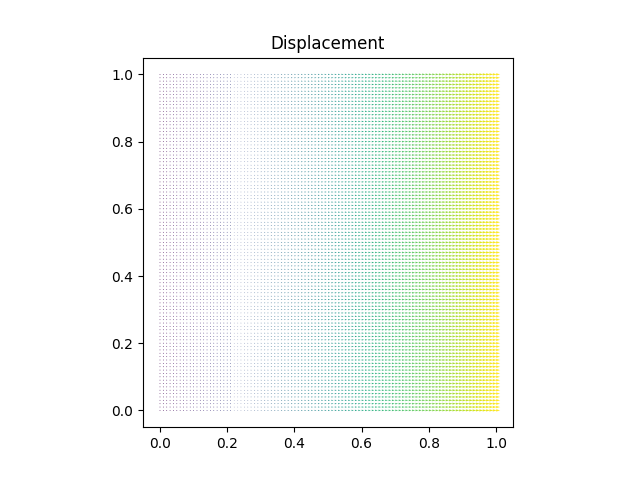

In [26]:
Image('./Mechanics_OneAgent/displacement.png')

## download the results

In [27]:
# on one-agent case
!ls ./Mechanics_OneAgent

displacement000000.vtu	displacement.png  displacement.pvd  fenics_displacement.py


In [28]:
!zip -r /content/MultiVsOne_Mechanics_OneAgent_files_OneStep.zip /content/Mechanics_OneAgent

  adding: content/Mechanics_OneAgent/ (stored 0%)
  adding: content/Mechanics_OneAgent/displacement.pvd (deflated 28%)
  adding: content/Mechanics_OneAgent/displacement.png (deflated 1%)
  adding: content/Mechanics_OneAgent/displacement000000.vtu (deflated 87%)
  adding: content/Mechanics_OneAgent/fenics_displacement.py (deflated 52%)


In [31]:
from google.colab import files

files.download("/content/MultiVsOne_Mechanics_OneAgent_files_OneStep.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# on multiple-agent case
!ls ./Mechanics

displacement000000.vtu	displacement.png  displacement.pvd  linear_elasticity


In [33]:
!zip -r /content/MultiVsOne_Mechanics_MulAgent_files_OneStep.zip /content/Mechanics

  adding: content/Mechanics/ (stored 0%)
  adding: content/Mechanics/displacement.pvd (deflated 28%)
  adding: content/Mechanics/displacement.png (deflated 2%)
  adding: content/Mechanics/linear_elasticity/ (stored 0%)
  adding: content/Mechanics/linear_elasticity/solution000000.vtu (deflated 72%)
  adding: content/Mechanics/linear_elasticity/solution.pvd (deflated 28%)
  adding: content/Mechanics/displacement000000.vtu (deflated 72%)


In [34]:
files.download("/content/MultiVsOne_Mechanics_MulAgent_files_OneStep.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Working code ends here